
# Predicting the Presence of Heart Disease using Age, Sex, and Cholesterol Levels

# Introduction
Heart Disease remains one of the top causes of morbidity & mortality worldwide; 
early detection and preventative measures are incredibly important when it comes to reducing its impact. There are several different kinds of heart disease, the most common is coronary artery disease. This occurs when plaque accumulates in the arteries and decreases or stops blood flow. Heart disease can cause chest pain, shortness of breath, weakness in extremities and in extreme cases death. It has many risk factors including high blood pressure, high cholesterol, smoking, diabetes and obesity. Risk also increases at older ages.      

## Question
This project seeks to answer the following question: can we predict the presence of heart disease in individuals based solely on their age, sex, and cholesterol levels?

## Dataset Description
The dataset our group chose for this project and analysis is the “Heart Disease” dataset from the UC Irvine Machine Learning Repository - it was one of the suggested datasets provided to us on Canvas. It consists of four databases; however, we chose to focus on the Cleveland database which contains 303 individual records, each with 14 attributes, including the target variable indicating the presence and severity of heart disease on a scale from zero to four. For simplification and to align with our binary classification goal, our team decided that this target will be converted to the following binary outcome: “Yes” for any non-zero value, which indicates the presence of heart disease, and “No” for a zero value, indicating its absence.


## Methods & Results:


#### (to be deleted later)
- describe in written English the methods you used to perform your analysis from beginning to end that narrates the code the does the analysis.
- **your report should include code which:**
- loads data from the original source on the web 
- wrangles and cleans the data from it's original (downloaded) format to the format necessary for the planned analysis
- performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis 
- creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis
- performs the data analysis
- creates a visualization of the analysis 
- note: all tables and figure should have a figure/table number and a legend


### Step 1: Loading data from the original source on the web:
The data was downloaded and placed into the remote repository on github. From there it was loaded into the file using the read_csv function.

In [1]:
### Run this cell before continuing.
library(tidyverse)
library(readr)
library(ggplot2)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

In [2]:
unscaled_heart_disease <- read_csv("https://raw.githubusercontent.com/angushf/heart_disease_project/main/processed.cleveland.data")

unscaled_heart_disease

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


### Step 2: Wrangling and cleaning the data from it's original (downloaded) format to the format necessary for the planned analysis

#### 2.1: Turning variable "num" into a binary variable "has_disease" with "yes" indicating the presence of heart disease, and "no" indicating its absence
The original format included the target variable, "num", which indicated the presence and severity of heart disease on a scale from zero to four. For simplification and to align with our binary classification goal, our team decided that this target will be converted to the following binary outcome: “Yes” for any non-zero value, which indicates the presence of heart disease, and “No” for a zero value, indicating its absence. Using a combination of the mutate and ifelse function, a new variable, "has_disease" was created based on the previous variable "num". Using the ifelse function any number greater than 0 was changed into "yes", while all other values were turned into "no". Using the as_factor function the variable was then changed into a factor from double, which is much more appropiate for a catagorical variable. The select function was then used to deselect variables "num", "ca", and "thal", which are no longer relevent for the rest of the project.

In [3]:
unscaled_heart_disease <- unscaled_heart_disease |>
  mutate(has_disease = ifelse(num > 0, "yes", "no")) |>
  select(-num, -ca, -thal) |>
  mutate(has_disease = as_factor(has_disease)) 

unscaled_heart_disease

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,has_disease
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,no
67,1,4,160,286,0,2,108,1,1.5,2,yes
67,1,4,120,229,0,2,129,1,2.6,2,yes
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,yes
57,0,2,130,236,0,2,174,0,0.0,2,yes
38,1,3,138,175,0,0,173,0,0.0,1,no


#### 2.2: Scaling all predictors and creating a recipe

In order to get a reliable prediction, we must scale our data. This is because predictors have different size units of measurement and so those with larger units will be incorrectly seem father away. The functions step_scale and step_center are used to standradize data points to a mean of 0 and standard deviation of 1. Followed by the prep function which calculates values needed for the recipe.


In [4]:
scaled_heart_disease_recipe <- recipe(has_disease ~ ., data = unscaled_heart_disease) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors()) |>
  prep()

scaled_heart_disease_recipe



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:    1
predictor: 11



── Training information 

Training data contained 303 data points and no incomplete rows.



── Operations 

• Scaling for: age, sex, cp, trestbps, chol, fbs, restecg, ... | Trained

• Centering for: age, sex, cp, trestbps, chol, fbs, restecg, ... | Trained



#### 2.3: Baking the scaled_heart_disease_recipe

The bake() function is used to apply the scaling and centering changes above to our unscaled data and create a standardized dataset.


In [5]:
scaled_heart_disease <- bake(scaled_heart_disease_recipe, unscaled_heart_disease)
scaled_heart_disease

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,has_disease
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.9471596,0.6850692,-2.2480557,0.7562740,-0.2644628,2.3904835,1.015005,0.01716893,-0.69548,1.0855423,2.2708221,no
1.3897030,0.6850692,0.8765355,1.6085589,0.7591593,-0.4169448,1.015005,-1.81889638,1.43311,0.3965257,0.6480412,yes
1.3897030,0.6850692,0.8765355,-0.6642009,-0.3417173,-0.4169448,1.015005,-0.90086373,1.43311,1.3439235,0.6480412,yes
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
0.2833446,0.6850692,0.8765355,-0.09601098,-2.2344526,-0.4169448,-0.9951031,-1.512885,1.43311,0.1381444,0.6480412,yes
0.2833446,-1.4548891,-1.2065253,-0.09601098,-0.2065219,-0.4169448,1.0150052,1.066349,-0.69548,-0.8953805,0.6480412,yes
-1.8187363,0.6850692,-0.1649949,0.35854099,-1.3846531,-0.4169448,-0.9951031,1.022633,-0.69548,-0.8953805,-0.9747397,no


#### 2.4: Selecting variables used in analysis
The variables that will be used in our analysis are selected and all other columns removed using the select function. The predictors are age, sex and cholesterol (chol) and has_disease is predicted factor.

In [6]:
scaled_heart_disease_select <- scaled_heart_disease |>
    select(age, sex, chol, has_disease)

scaled_heart_disease_select

age,sex,chol,has_disease
<dbl>,<dbl>,<dbl>,<fct>
0.9471596,0.6850692,-0.2644628,no
1.3897030,0.6850692,0.7591593,yes
1.3897030,0.6850692,-0.3417173,yes
⋮,⋮,⋮,⋮
0.2833446,0.6850692,-2.2344526,yes
0.2833446,-1.4548891,-0.2065219,yes
-1.8187363,0.6850692,-1.3846531,no


### Summarizing data in table
Our data is split into testing and training data. The training data will be used for data analysis and creating model, while the testing data will be used to test the accuracy of this model.We use our training data to summarize the amount of individuals with or without heart disease. This table is chosen because it will tell us the proportion of the sample that has heart disease. 

In [7]:
heart_disease_split <- initial_split(scaled_heart_disease_select, prop = 0.75, strata = has_disease)
heart_disease_train <- training(heart_disease_split)
heart_disease_test <- testing(heart_disease_split)

glimpse(heart_disease_train)

Rows: 227
Columns: 4
$ age         <dbl> 0.94715962, -1.92937218, -1.48682883, 0.17270875, 0.283344…
$ sex         <dbl> 0.6850692, 0.6850692, -1.4548891, 0.6850692, -1.4548891, -…
$ chol        <dbl> -0.264462814, 0.063868821, -0.824557956, -0.206521937, 2.0…
$ has_disease <fct> no, no, no, no, no, no, no, no, no, no, no, no, no, no, no…


In [8]:
glimpse(heart_disease_test)

Rows: 76
Columns: 4
$ age         <dbl> 1.38970298, 0.28334459, -0.26983460, 0.39398043, -0.491106…
$ sex         <dbl> 0.6850692, 0.6850692, 0.6850692, 0.6850692, -1.4548891, -1…
$ chol        <dbl> -0.3417173, -1.0563215, -0.9211261, 0.7205321, -0.5348536,…
$ has_disease <fct> yes, no, no, yes, no, no, yes, no, yes, no, yes, yes, yes,…


In [9]:
heart_disease_proportions <- heart_disease_train |>
    group_by(has_disease) |>
    summarize(n = n()) |>
    mutate(percent = 100*n/nrow(heart_disease_train))

heart_disease_proportions

has_disease,n,percent
<fct>,<int>,<dbl>
no,123,54.18502
yes,104,45.81498


#### Table findings
From this table we discover that around 46% of our sample has heart disease. This shows that we have similar numbers of individuals with and without heart disease in our training data and we can use this to dataset make our predictions. 

### Visualizing data
We decided to visualize our data by graphing cholesterol levels against age and colour coding our data by whether the individual has heart disease. The graph is made using the ggplot function with geom_point() to create a scatter plot. This graph will show us the relationship between two of our predictors and how this relates to presence of heart disease. 

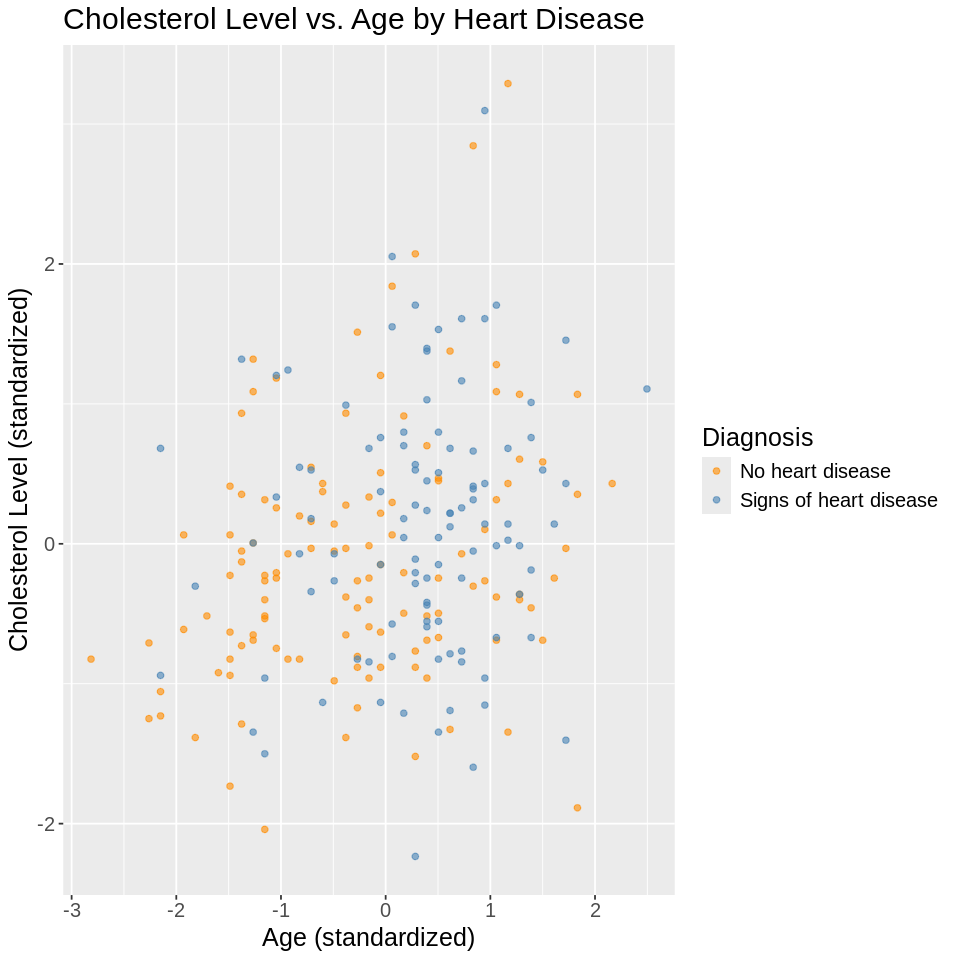

In [12]:
options(repr.plot.width = 8, repr.plot.height = 8) 
heart_disease_plot <- ggplot(heart_disease_train, aes(x = age, y = chol, color = as.factor(has_disease))) +
  geom_point(alpha = 0.6) +
  labs(title = "Cholesterol Level vs. Age by Heart Disease",
       x = "Age (standardized)",
       y = "Cholesterol Level (standardized)",
       color = "Diagnosis") +
  scale_color_manual(values = c("darkorange", "steelblue"),
                     labels = c("no" = "No heart disease", "yes" = "Signs of heart disease")) +
  theme(text = element_text(size=15))

heart_disease_plot


#### Graph findings
This graph shows us that there is a weak positive relationship between age and cholesterol levels. As well, heart disease can be found throughout plot but is more common in older individuals with higher cholesterol levels.



#### Data analysis
used to select k-value for best accuracy

[1] 16

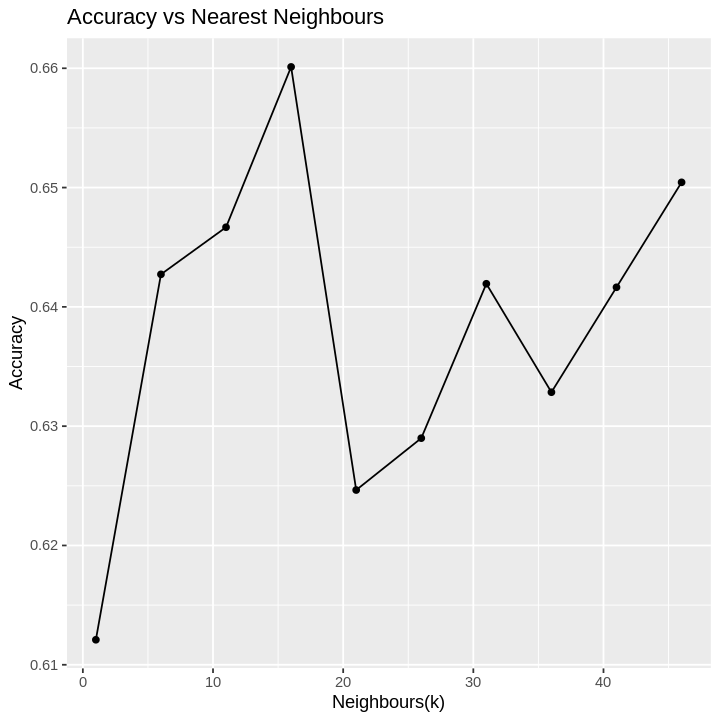

In [40]:
set.seed(425)
training_vfold<-vfold_cv(heart_disease_train, v=5, strata=has_disease)

training_recipe<-recipe(has_disease~.,data=heart_disease_train)

knn_spec<-nearest_neighbor(weight_func = "rectangular", neighbors =tune()) |>
       set_engine("kknn") |>
       set_mode("classification")

values<-tibble(neighbors=seq(from=1, to=50, by=5))

cross_val_workflow<-workflow()|>
add_recipe(training_recipe)|>
add_model(knn_spec)|>
tune_grid(resamples=training_vfold, grid=values)|>
               collect_metrics()|>
               filter(.metric=="accuracy")
 options(repr.plot.width = 2, repr.plot.height = 2) 
cross_val_plot<-ggplot(cross_val_workflow, aes(x=neighbors, y=mean))+
               geom_point()+
               geom_line()+
               labs(x="Neighbours(k)", y="Accuracy")+
            ggtitle("Accuracy vs Nearest Neighbours")
cross_val_plot

k_value<-cross_val_workflow|>
arrange(desc(mean))|>
head(1)|>
pull(neighbors)
k_value

### Make actual model

In [34]:
set.seed(1723)
heart_spec<-nearest_neighbor(weight_func="rectangular", neighbors=k_value)|>
set_engine("kknn")|>
set_mode("classification")

heart_fit<-workflow()|>
add_recipe(training_recipe)|>
add_model(heart_spec)|>
fit(data=heart_disease_train)


### Test predictions 
(Use notes to write methods can be deleted after.)
Use to test accuracy, precision and recall
heart_responses is to figure out which category is first 

In [38]:
heart_test_predictions<-predict(heart_fit, heart_disease_test)|>
bind_cols(heart_disease_test)

heart_test_metrics<-heart_test_predictions|>
metrics(truth=has_disease, estimate=.pred_class)|>
filter(.metric=="accuracy")
heart_test_metrics

heart_conf_mat<-heart_test_predictions|>
conf_mat(truth=has_disease, estimate=.pred_class)
heart_conf_mat



.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6447368


          Truth
Prediction no yes
       no  30  16
       yes 11  19

In [36]:
heart_responses<-heart_test_predictions|>
pull(has_disease)|>
levels()
heart_responses

heart_precision<-heart_test_predictions |>
  precision(truth = has_disease, estimate = .pred_class, event_level = "second")
heart_precision

[1] "no"  "yes"

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.6333333


In [37]:
heart_recall<-heart_test_predictions |>
  recall(truth = has_disease, estimate = .pred_class, event_level = "second")
heart_recall

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.5428571


## Discussion:
#### (to be deleted later)

- summarize what you found
- discuss whether this is what you expected to find?
- discuss what impact could such findings have?
- discuss what future questions could this lead to?

## References:

&nbsp; &nbsp; &nbsp; &nbsp; Hassan, Ch Anwar Ul, et al. “Effectively Predicting the Presence of Coronary Heart Disease Using Machine Learning Classifiers.” National Library of Medicine, U.S. National Library of Medicine, 23 Sept. 2022, www.ncbi.nlm.nih.gov/pmc/articles/PMC9573101/. 

&nbsp; &nbsp; &nbsp; &nbsp; Janosi,Andras, Steinbrunn,William, Pfisterer,Matthias, and Detrano,Robert. (1988). Heart Disease. UCI Machine Learning Repository. https://doi.org/10.24432/C52P4X.

&nbsp; &nbsp; &nbsp; &nbsp; MayoClinic. “Heart Disease.” Mayo Clinic, Mayo Foundation for Medical Education and Research, 25 Aug. 2022, www.mayoclinic.org/diseases-conditions/heart-disease/symptoms-causes/syc-20353118#:~:text=Heart%20disease%20describes%20a%20range,born%20with%20(chttps://www.mayoclinic.org/diseases-conditions/heart-disease/symptoms-causes/syc20353118#:~:text=Heart%20disease%20describes%20a%20range,born%20with%20(congenital%20heart%20defects)ongenital%20heart%20defects). 


}